Another method of data preparation(use this one)
assume the data is already given as abnormal and normal

In [1]:
#import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from imutils import paths
from random import shuffle, choice
from PIL import Image
from random import randint
import argparse
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib as plt
import random
import glob
import matplotlib.pyplot as plt
import time
import pandas as pd
import cv2
import math


In [3]:
#here import .py file
#make sure the py file path is same as ipynb path
import sys
sys.path.append("C:/Users/User/DEEP LEARNING")
import anis_koubaa_lib
from anis_koubaa_lib import *

#here we assume the data is already given as abnormal and normal
dataset_path="C:/Users/User/Pictures/sajo try data TB/pulmonary-chest-xray-abnormalities/X-ray"
IMAGE_SIZE=224

#LOAD THE DATASET
data,labels= anis_koubaa_lib.load_rgb_data_cv(dataset_path,IMAGE_SIZE, shuffle=True)


ModuleNotFoundError: No module named 'anis_koubaa_lib'

In [4]:
anis_koubaa_lib.plot_sample_from_dataset(data, labels, rows=5, colums=5, width=20, height=10)

NameError: name 'anis_koubaa_lib' is not defined

In [5]:
#change index to any number to see different image
anis_koubaa_lib.display_image(data,labels,index=10)

NameError: name 'anis_koubaa_lib' is not defined

In [6]:
anis_koubaa_lib.display_dataset_shape(data, labels)

NameError: name 'anis_koubaa_lib' is not defined

In [7]:
#display classes of dataset
anis_koubaa_lib.display_dataset_folders(dataset_path)

NameError: name 'anis_koubaa_lib' is not defined

In [8]:
#make csv file to store collected stats
stats=anis_koubaa_lib.get_data_distribution(dataset_path,output_file='C:/Users/User/DEEP LEARNING/stats_XRay.csv')

NameError: name 'anis_koubaa_lib' is not defined

In [9]:
#range=size in kb, bins=ketebalan bar chart
#most data have size between 200-400 
anis_koubaa_lib.plot_dataset_distribution(stats,num_cols=1,width=10,height=10,histogram_bins=50,histogram_range=[0,1000])

NameError: name 'anis_koubaa_lib' is not defined

# Data Loading 

In [10]:
data,labels=anis_koubaa_lib.load_rgb_data_cv(dataset_path,IMAGE_SIZE,shuffle=True)

#NORMALIZE THE DATA BY /255
data=anis_koubaa_lib.normalize_data(data)

#perform one hot encoding on the labels
#PRINT THE FIRST 5 DATA
print("Labels: ",labels[:5])
lb = LabelBinarizer()
binary_labels = lb.fit_transform(labels)
print("binary_labels after Binarizer: ", binary_labels[:5])
hot_encoded_labels= to_categorical(binary_labels)
print("hot_encoded_labels after one-hot encoding: ", hot_encoded_labels[:5])

NameError: name 'anis_koubaa_lib' is not defined

In [11]:
#separate the data into training and testing dataset
#80% for training and 20% for testing

( train_data, test_data, train_target, test_target ) = train_test_split(data, hot_encoded_labels, test_size=0.20, stratify=hot_encoded_labels, random_state=42)

anis_koubaa_lib.plot_sample_from_dataset(train_data, train_target, rows=3, colums=2, width=10, height=10)
display_dataset_shape(train_data,train_target)
display_dataset_shape(test_data,test_target)


NameError: name 'data' is not defined

## PSO LOOP

In [241]:

np.set_printoptions(suppress=True)

debug = True
#Initialize Population  [64, 32, 16, 16, 0.1, P, V, W, loss,accuracy , fitness]
popSize = 5
for i in range(popSize):
    
    dropout = round(random.uniform(0.1,0.5), 1)
    layer1 = random.randint(1, 8)*8
    layer2 = random.randint(1, 8)*8
    layer3 = random.randint(1, 8)*8
    layer4 = random.randint(1, 8)*8
    position = round(random.uniform(0,1), 2)
    velocity = round(random.uniform(0,1), 2)
    weight= 0.90
    
    if(debug):
        print("New Population : ",i+1)
       
        print("layer1: ",layer1, end =" ")
        print("layer2: ",layer2, end =" ")
        print("layer3: ",layer3, end =" ")
        print("layer4: ",layer4, end =" ")
        print("dropout: ",dropout, end =" ")
        print("velocity: ",velocity, end =" ")
        print("position: ",position, end =" ")
        print("weight constant: ",weight)
    
    new = [layer1, layer2, layer3,layer4,dropout,position,velocity,weight,1,0,0]
    if(i==0):
        popdata = [new]
    else:
        popdata = np.vstack((popdata, new))
    
    
print("Popualtion Shape : ",popdata.shape)
print(popdata[1])
print("Results Acc:",popdata[1,9])
print("Results Loss:",popdata[1,8])
# Update results in tensorflow
print (popdata)

for i in range(popdata.shape[0]):
    
    #Runn The Model Here RANDOM NUMBERS FOR NOW
    accuracy = round(random.uniform(0.5,0.99), 2)
    loss = round(random.uniform(1,0.01), 2)
    # get the results
    results = RunModelDesign(popdata[i]);
    
    popdata[i,9]= accuracy
    popdata[i,8]= loss
    
    if(debug):
        print("Runnning Model: ",i+1, " accuracy: ",accuracy," loss: ",loss);
    
print(popdata)


# calculate fitness 

for i in range(popdata.shape[0]):
    accuracy = popdata[i,9]
    loss = popdata[i,8]
    fitness = accuracy + (1-loss)*5
    popdata[i,10]= round(fitness,2)
    print(i+1,"-Calculate Fitness :",round(fitness,2))
    
    
    
from datetime import datetime
import calendar
d = datetime.utcnow()
unixtime = calendar.timegm(d.utctimetuple())
#SAVE TO CSV RESULTS

csvFileName = "PopualtionData_"+str(popSize)+"_TIME"+str(unixtime)+".csv"
print("Population Results Saved : ",csvFileName )
np.savetxt(csvFileName, popdata, delimiter=",", fmt='%f')


#Find Best model in batch

max_index_col = np.argmax(popdata[:,10], axis=0)
print("Best Model Found", popdata[max_index_col])
global_bestP = popdata[max_index_col,6]
print(" L1     L2     L3    L4    DP    V      P     W    Loss   Acc   Fit")
print(popdata)
# calculate new velocity
#for each denseLAYER COMBINATION 
    # V-new = WEIGHT * V-old + C1 * ( RANDOM(0-1) * P) + (RANDOM(0-1) * C2) dense[i,5] (global best P) - Pold 
    # p-new = P-old + Vnew
    #[00, 00,  00, 0.1,Pnew,Vnew,W,loss,accuracy]

    
    
for i in range(popdata.shape[0]):
    oldV = popdata[i,5]
    oldP = popdata[i,6]  
    weight = popdata[i,7]
    rand01 = round(random.uniform(0,1), 1)
    c1 = 0.1
    c2 = 0.1
    
    newV = weight * oldV +  c1 * ( rand01 * global_bestP ) + (rand01 * c2) - oldP
    popdata[i,5] = round(newV,2)
    newP = oldP + newV
    popdata[i,6] = round(newP,2)
print("Updates New Position adn Velocity")
print(" L1     L2     L3    L4    DP    V      P     W    Loss   Acc   Fit")
print(popdata)
#each model(on an specific epoch) produces val_loss: 0.6911 min - val_accuracy: 0.5063 max
# V-new = WEIGHT * V-old + C1 * RANDOM(0-?)


csvFileName = "Updated_PopualtionData_"+str(popSize)+"_TIME"+str(unixtime)+".csv"
print("Population Results Saved : ",csvFileName )
np.savetxt(csvFileName, popdata, delimiter=",", fmt='%f')


New Population :  1
layer1:  64 layer2:  48 layer3:  32 layer4:  32 dropout:  0.2 velocity:  0.48 position:  0.55 weight constant:  0.9
New Population :  2
layer1:  40 layer2:  16 layer3:  8 layer4:  24 dropout:  0.3 velocity:  0.99 position:  0.35 weight constant:  0.9
New Population :  3
layer1:  8 layer2:  24 layer3:  40 layer4:  48 dropout:  0.5 velocity:  0.22 position:  0.55 weight constant:  0.9
New Population :  4
layer1:  16 layer2:  8 layer3:  32 layer4:  8 dropout:  0.2 velocity:  0.81 position:  0.17 weight constant:  0.9
New Population :  5
layer1:  56 layer2:  64 layer3:  40 layer4:  24 dropout:  0.1 velocity:  0.8 position:  0.73 weight constant:  0.9
Popualtion Shape :  (5, 11)
[40.   16.    8.   24.    0.3   0.35  0.99  0.9   1.    0.    0.  ]
Results Acc: 0.0
Results Loss: 1.0
[[64.   48.   32.   32.    0.2   0.55  0.48  0.9   1.    0.    0.  ]
 [40.   16.    8.   24.    0.3   0.35  0.99  0.9   1.    0.    0.  ]
 [ 8.   24.   40.   48.    0.5   0.55  0.22  0.9   1.   

In [303]:
#Initialize Data


data
(train_data, test_data, train_target, test_target ) = train_test_split(data, hot_encoded_labels, test_size=0.20, stratify=hot_encoded_labels, random_state=42)


def RunModelDesign(settings):
    
  
    #Load the VGG19 model, top layers off
    baseModel = VGG19(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
    INIT_LR= 1e-3 # 0.001 
    EPOCHS= 10
    BS= 8
    
    print("Running Experiment : ",settings)
    print("layer-1:",settings[0])
    headModel=baseModel.output
    headModel=AveragePooling2D(pool_size=(4,4))(headModel)
    headModel=Flatten(name="flatten")(headModel)
    headModel=Dense(settings[0],activation="relu")(headModel) #LAYER 
    headModel=Dense(settings[1],activation="relu")(headModel) #LAYER 
    headModel=Dense(settings[2],activation="relu")(headModel) #LAYER 
    headModel=Dense(settings[3],activation="relu")(headModel) #LAYER 
    headModel=Dropout(settings[4])(headModel)# MIN-MAX 0.1-0.5
    headModel=Dense(2,activation="softmax")(headModel) # abnormal /non compliant 
    model= Model(inputs=baseModel.input, outputs=headModel)
    if(debug):
        model.summary()
        
    for layer in baseModel.layers:
        layer.trainable = False

    print("[INFO] compiling model....")
    opt=Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    
    print("[INFO] Training the model....")
    
    
    filepath = str(int(settings[0]))+"-"+str(int(settings[1]))+"-"+str(int(settings[2]))+"-"+str(int(settings[3]))+"-DP0"+str(int(10*settings[4]))+"-VGG19.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                                 save_best_only=True, mode='max')
    print("[INFO] model file: ",filepath)
    
    
    #initialize training data augmentation
    trainAug= ImageDataGenerator(rotation_range=15,
                                 rescale=1./255,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode="nearest")
    

    History=model.fit(
        trainAug.flow(train_data,train_target,batch_size=BS),
        steps_per_epoch=len(train_data)//BS,
        validation_data=(test_data,test_target),
        validation_steps=len(test_data)//BS,
        epochs=5,
        callbacks=[checkpoint])
    
    
    

NameError: name 'data' is not defined

In [302]:
RunModelDesign(popdata[i])

Running Experiment :  [56.   64.   40.   24.    0.1  -0.03  0.77  0.9   0.48  0.95  3.55]
layer-1: 56.0
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________

NameError: name 'train_data' is not defined

In [274]:
#blueprint [ layer1, layer2, layer3, dropout]
#value blueprint 
#dropout  0.1 - 0.5
#layer1  16-64
#layer2  0-64
#layer3  0-64


#RULES  

#GENERATE INITIALIZATION
# position = random(minmax(0,1)
# velocity = random(minmax(0,1)
# weight value = 0.9 (constant)
# C1 = 0.1  
# C2 = 0.1  

#3 POPULATION P V W random based on GENERATE INITIALIZATION
dense = [
         [64, 32, 16,0.1,P,V,W,loss,accuracy],#p_best_loss and p_best_accuracy 
         [16, 8 ,  8,0.1,P,V,W,loss,accuracy],#p_best_loss and p_best_accuracy 
         [64, 32,  0,0.1,P,V,W,loss,accuracy],#p_best_loss and p_best_accuracy 
        ]

#Search best global best = val_loss: min + val_accuracy: max
#Fittness --> result (SEARCH IN EPOCH VALIDATION)
#Update Position 

#for each denseLAYER COMBINATION 
    # V-new = WEIGHT * V-old + C1 * ( RANDOM(0-1) * P) + (RANDOM(0-1) * C2) dense[i,5] (global best P) - Pold 
    # p-new = P-old + Vnew
    #[00, 00,  00, 0.1,Pnew,Vnew,W,loss,accuracy]


#each model(on an specific epoch) produces val_loss: 0.6911 min - val_accuracy: 0.5063 max
# V-new = WEIGHT * V-old + C1 * RANDOM(0-?)



#get best results of model 
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

#update save to csv 
#https://stackoverflow.com/questions/6081008/dump-a-numpy-array-into-a-csv-file


for i in range(dense.shape[0])

#make the top layer that will be used

headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(4,4))(headModel)
headModel=Flatten(name="flatten")(headModel)

#Layer---------------------------------------------------------DEFINITION 

headModel=Dense(dense[i,1],activation="relu")(headModel) #LAYER 


if(dense[i,1] != 0)
    headModel=Dense(dense[i,2],activation="relu")(headModel) #LAYER 
    
if(dense[i,1] != 0)
    headModel=Dense(dense[i,3],activation="relu")(headModel) #LAYER 
    
headModel=Dropout(dense[i,4])(headModel)# MIN-MAX 0.1-0.5

#Layer---------------------------------------------------------DEFINITION 

headModel=Dense(2,activation="softmax")(headModel) # abnormal /non compliant 

#place the top layer into actual model to train
model= Model(inputs=baseModel.input, outputs=headModel)

#summary model architecture
model.summary()

SyntaxError: invalid syntax (<ipython-input-274-2ffec6d791d2>, line 47)

In [275]:
# don't train existing weights
#freeze the weight layers from all the layers in the model
for layer in baseModel.layers:
    layer.trainable = False

In [15]:
#compile the model
print("[INFO] compiling model....")
opt=Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

[INFO] compiling model....


In [21]:
#train the model
print("[INFO] Training the model....")
filepath = "TB_Xray_VGG19.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

History=model.fit(
    trainAug.flow(train_data,train_target,batch_size=BS),
    steps_per_epoch=len(train_data)//BS,
    validation_data=(test_data,test_target),
    validation_steps=len(test_data)//BS,
    epochs=5,
    callbacks=[checkpoint])

[INFO] Training the model....
Epoch 1/5
80/80 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.5047
Epoch 00001: val_accuracy improved from -inf to 0.50625, saving model to TB_Xray_VGG19.h5
80/80 [==============================] - 616s 8s/step - loss: 0.7485 - accuracy: 0.5047 - val_loss: 0.7123 - val_accuracy: 0.5063
Epoch 2/5
80/80 [==============================] - ETA: 0s - loss: 0.7067 - accuracy: 0.4828
Epoch 00002: val_accuracy did not improve from 0.50625
80/80 [==============================] - 533s 7s/step - loss: 0.7067 - accuracy: 0.4828 - val_loss: 0.6911 - val_accuracy: 0.5063
Epoch 3/5
80/80 [==============================] - ETA: 0s - loss: 0.7002 - accuracy: 0.4797
Epoch 00003: val_accuracy did not improve from 0.50625
80/80 [==============================] - 534s 7s/step - loss: 0.7002 - accuracy: 0.4797 - val_loss: 0.6905 - val_accuracy: 0.5063
Epoch 4/5
80/80 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.4875
Epoch 00

In [22]:
model.save("Xray-VGG19.h5")

Make predictions

In [16]:
print("[INFO] Loading Model....")
model=tf.keras.models.load_model("Xray-VGG19.h5")

[INFO] Loading Model....


In [17]:
num_val_samples = len(test_data)
val_batch_size = BS

val_steps = np.ceil(num_val_samples / val_batch_size) #160 / 8 = 20 steps per epoch
print(len(test_data))

160


In [18]:
# Here the best epoch will be used.
#validate the model
print("[INFO] evaluating model....")

model.load_weights("Xray-VGG19.h5")
val_loss, val_acc = \
model.evaluate(test_data, 
               steps=val_steps)
#predicts=model.predict(test_data,verbose=1)
print('val_loss:', val_loss)
print('val_acc:', val_acc)

[INFO] evaluating model....
20/20 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
val_loss: 0.0
val_acc: 0.0


Label = [1. 0.]
image shape:  (224, 224, 3)


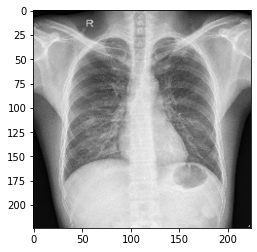

In [19]:
#Abnormal = [1. 0.]
#Normal = [0. 1.]
index=3
image=test_data[index]
anis_koubaa_lib.display_image(test_data,test_target,index)




In [305]:
def reshape_image_for_neural_network_input(image, IMAGE_SIZE=224):
    print ("flatten the image")
    image = np.reshape(image,[IMAGE_SIZE* IMAGE_SIZE*3,1])
    print ("image.shape", image.shape)
    print ("reshape the image to be similar to the input feature vector")
    #image = np.reshape(image,[1,IMAGE_SIZE, IMAGE_SIZE,3]).astype('float')
    image = image.reshape(1,IMAGE_SIZE,IMAGE_SIZE,3).astype('float')
    print ("image.shape", image.shape)
    return image

In [21]:
#import anis_koubaa_lib
#from anis_koubaa_lib import *
#image=anis_koubaa_lib.reshape_image_for_neural_network_input(image)
#Abnormal = [1. 0.]
#Normal = [0. 1.]
image=reshape_image_for_neural_network_input(image)

predProbabilities= model.predict(image,verbose=1)

print("true label: ", test_target[index])
print("predicted label: ",predProbabilities)

flatten the image
image.shape (150528, 1)
reshape the image to be similar to the input feature vector
image.shape (1, 224, 224, 3)
1/1 [==============================] - 0s 6ms/step
true label:  [1. 0.]
predicted label:  [[0.48910496 0.510895  ]]


In [22]:
#for each image in the test dataset, we need to find the index of the label with the largest probability
#[1] = normal , [0] = abnormal
predIndex=np.argmax(predProbabilities,axis=1)
print("Predicted label: ",predIndex)

Predicted label:  [1]


# Training the model(other method(tak guna))

In [16]:
datagen = ImageDataGenerator(rescale=1./255.)

train_generator = datagen.flow(trainX,
                               trainY,
                               batch_size=BS)
                               #target_size=(224,224),
                               #class_mode='categorical',
                               #follow_links=True)

valid_generator = datagen.flow(testX,
                               testY,
                               batch_size=BS)
                               #target_size=(224,224),
                               #class_mode='categorical',
                               #follow_links=True)

In [17]:
print(train_generator.n)
print(valid_generator.n)

640
160


In [20]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
h=model.fit(train_generator,
          steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,
          validation_steps=STEP_SIZE_VALID,
          epochs=10)

Epoch 1/10
80/80 [==============================] - 641s 8s/step - loss: 0.7719 - accuracy: 0.5156 - val_loss: 0.7010 - val_accuracy: 0.4938
Epoch 2/10
80/80 [==============================] - 637s 8s/step - loss: 0.7064 - accuracy: 0.4734 - val_loss: 0.6959 - val_accuracy: 0.4938
Epoch 3/10
80/80 [==============================] - 663s 8s/step - loss: 0.6975 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5063
Epoch 4/10
80/80 [==============================] - 617s 8s/step - loss: 0.6973 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 5/10
80/80 [==============================] - 707s 9s/step - loss: 0.6946 - accuracy: 0.4797 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/10
80/80 [==============================] - 622s 8s/step - loss: 0.6944 - accuracy: 0.4781 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 7/10
80/80 [==============================] - 642s 8s/step - loss: 0.6942 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 8/10
80

In [21]:
model.save("Xray-vgg19.h5")

Classification report

In [ ]:
predProbabilities=model.predict(test_data,verbose=1)
predIndex=np.argmax(predProbabilities,axis=1)

print(classification_report(test_target.argmax(axis=1),predIndex,target_names=lb.classes_))